## Senario-1 Seti Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
from PIL import Image
import matplotlib

In [2]:
import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation,BatchNormalization
from tensorflow.keras.preprocessing import image

In [3]:
print(tensorflow.__version__)

2.2.0


In [4]:
columns=['squiggle', 'narrowband', 'narrowbanddrd','noise']

In [7]:
x_train=pd.read_csv('train/images.csv')
y_train=pd.read_csv('train/labels.csv',names=columns,header=None)
x_test=pd.read_csv('valid/imagest.csv')
y_test=pd.read_csv('valid/labelst.csv',names=columns,header=None)

In [10]:
x_train=x_train.reshape(len(x_train),128,64)
x_test=x_test.reshape(len(x_test),128,64)

In [9]:
x_train=x_train.to_numpy()
x_test=x_test.to_numpy()

### Creating data for Image data generator

In [ ]:
# Creating data fot train data generator

for i in range(len(y_train)):
    if(y_train.iloc[i][0]== 1.0):
        matplotlib.image.imsave('setidataset/trainseti/squiggle/train{}.png'.format(i),x_train[i])
    elif(y_train.iloc[i][1]== 1.0):
        matplotlib.image.imsave('setidataset/trainseti/narrowband/train{}.png'.format(i),x_train[i])
    elif(y_train.iloc[i][2]== 1.0):
        matplotlib.image.imsave('setidataset/trainseti/narrowbanddrd/train{}.png'.format(i),x_train[i])
    else:
        matplotlib.image.imsave('setidataset/trainseti/noise/train{}.png'.format(i),x_train[i])

In [ ]:
#creating data for validation data generator

for i in range(len(y_test)):
    if(y_test.iloc[i][0]== 1.0):
        matplotlib.image.imsave('setidataset/testseti/squiggle/test{}.png'.format(i),x_test[i])
    elif(y_test.iloc[i][1]== 1.0):
        matplotlib.image.imsave('setidataset/testseti/narrowband/test{}.png'.format(i),x_test[i])
    elif(y_test.iloc[i][2]== 1.0):
        matplotlib.image.imsave('setidataset/testseti/narrowbanddrd/test{}.png'.format(i),x_test[i])
    else:
        matplotlib.image.imsave('setidataset/testseti/noise/test{}.png'.format(i),x_test[i])

In [13]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"setidataset/trainseti"
validation_data_dir=r"setidataset/testseti"
nb_train_sample =100  # no. of batches of training samples
nb_validation_samples =40 # no. of batches of validation samples
epochs =20
batch_size= 20

In [14]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)
input_shape

(150, 150, 3)

In [17]:
train_datagen=ImageDataGenerator (rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)


test_datagen=ImageDataGenerator (rescale=1. /255)


train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical',classes=['squiggle', 'narrowband', 'narrowbanddrd','noise'])


validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='categorical')



Found 3199 images belonging to 4 classes.
Found 799 images belonging to 4 classes.


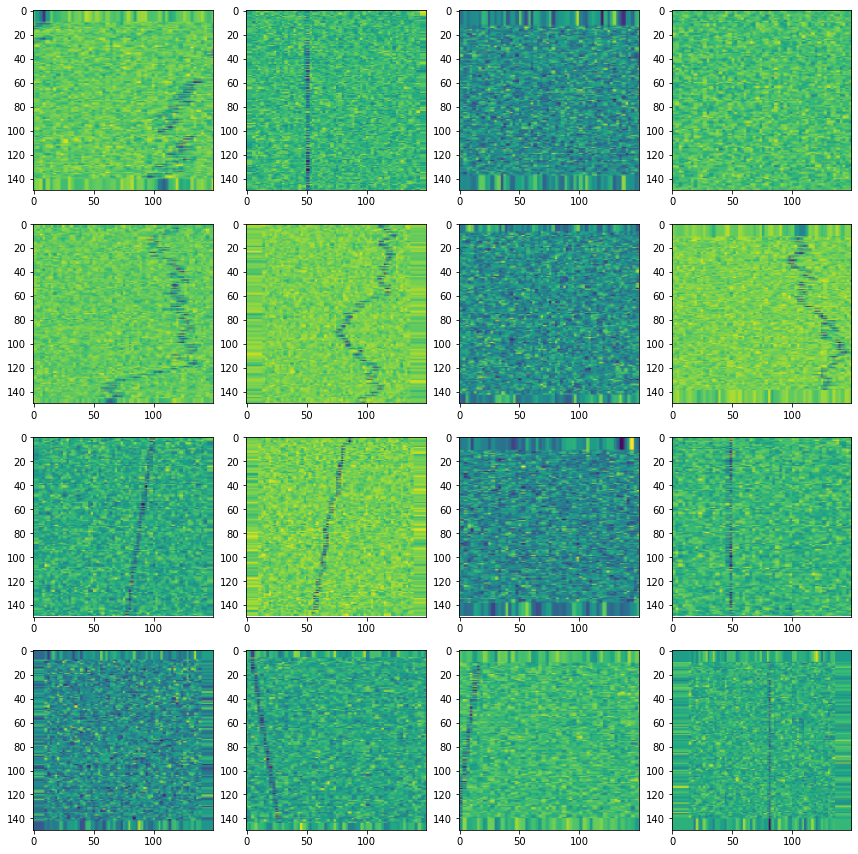

In [18]:
#Visualizing data
plt.figure(figsize=(12, 12))
for i in range(0, 16):
    plt.subplot(4, 4, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        label = Y_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [19]:
model2 = Sequential()
model2.add(Conv2D(32,(3,3), activation='relu', input_shape=input_shape)) 
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
#model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(4, activation='softmax')) 

In [20]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       7

In [21]:
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

In [23]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,
                               callbacks=callbacks)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 151s 2s/step - loss: 3.8135 - accuracy: 0.6508 - val_loss: 21.6672 - val_accuracy: 0.2466 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 138s 1s/step - loss: 1.3731 - accuracy: 0.6810 - val_loss: 91.6407 - val_accuracy: 0.1101 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 130s 1s/step - loss: 1.2892 - accuracy: 0.6660 - val_loss: 252.5869 - val_accuracy: 0.2491 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 135s 1s/step - loss: 0.9122 - accuracy: 0.6895 - val_loss: 159.8454 - val_accuracy: 0.2491 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 140s 1s/step - loss: 0.6901 - accuracy: 0.6828 - val_loss: 96.9007 - val_accuracy: 0.2541 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 147s 1s/step - loss: 0.7627 - accuracy: 0.6610 - val_loss: 59.1610 - val_accuracy: 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


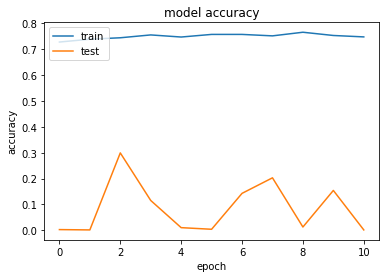

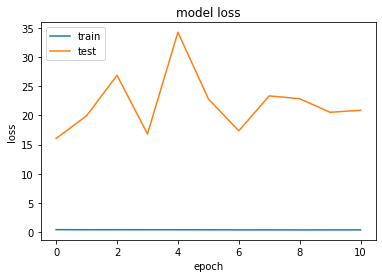

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [111]:
img_pred = image.load_img("setidataset/trainseti/train46.png",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)

[[1. 0. 0. 0.]]
